# Nama : Tri Agung Hermawan
# NIM : 09011381722108
# Kelas : SK 5 Palembang

# PEMODELAN SISTEM KONTROL TRAFFIC LIGHT BERDASARKAN KEPADATAN KENDARAAN

Lampu lalu lintas adalah factor penting dalam pengaturan transportasi jalan raya. Semakin berkembangnya zaman maka semakin ramai pula jumlah kendaraan yang melintas. Masalah yang akan timbul adalah ke tidak teraturan lalu lintas bahkan kemacetan yang panjang, terutama pada jalan jalan sibuk, dan bahkan terjadi pula pada persimpangan lalu lintas. Pengaturan lampu lalu lintas yang baik adalah yang mampu mengetahui kondisi saat itu.

Solusi yang mungkin dilakukan adalah dengan menggunakan aturan logika fuzzy pada sistem pengaturan lampu lalu lintas. perencanaan sistem pengaturan lampu lalu lintas yang baru ini menggunakan metode mamdani atau min-max. sedangkan untuk mengambil data objek berupa kendaraan menggunakan kamera dengan metode deteksi tepi (edge detection). Tapi disini hanya membahas tentang logika fuzzynya saja. 

Dengan pengaturan lampu lalu lintas berbasis logika fuzzy dapat diketahui kondisi dari setiap jalan yang memungkinkan pemberian layanan lampu yang berubah sesuai dengan kondisi dari tiap jalan.

In [4]:
import numpy as np
import skfuzzy as fuzz
import matplotlib.pyplot as plt
from skfuzzy import control as ctrl

Variabel input yang digunakan 2, yaitu :

Input 1 : Jumlah kendaraan diatur (JKD), dibagi menjadi 4 bagian, yaitu :
          1. Tidak Padat pada range 0 sampai 6000
          2. Normal pada range 4500 sampai 7500
          3. Padat pada range 6000 sampai 9000
          4. Sangat Padat pada range 7500 sampai 11000

Input 2 : Jumlah keadaan selanjutnya (JKS), dibagi menjadi 4 bagian, yaitu :
          1. Tidak Padat pada range 0 sampai 6000
          2. Normal pada range 4500 sampai 7500
          3. Padat pada range 6000 sampai 9000
          4. Sangat Padat pada range 7500 sampai 11000

Variabel output yang digunakan 1, yaitu : 

Output : Lama lampu Hijau (DL), dibagi menjadi 4 bagian, yaitu : 
         1. Cepat pada range 0 sampai 20
         2. Sedang pada range 14 sampai 50
         3. Agak Lama pada range 40 sampai 80
         4. Lama pada range 74 sampai 100

## FUZZIFIKASI DAN PLOTTING MEMBERSHIP FUNCTION

### Fuzzifikasi JKD
Jumlah Kendaraan saat keadaan diatur(JKD) mempunyai rentang nilai kemacetan dari 0 sampai 11000

In [5]:
JKD = ctrl.Antecedent(np.arange(0, 11000, 1), 'JKD')
JKD_x = np.arange(0,11000,1)

Proses untuk mengubah variabel non numerik menjadi variabel non fuzzy (numerik) menjadi variabel fuzzy (linguistik)

Untuk Jumlah Kendaraan Saat Keadaan Diatur, fungsi keanggotaan dibagi menjadi 4 bagian :
$$ Jumlah Kendaraan Saat Keadaan Diatur $$
$$ Tidak Padat = 0 - 6000$$
$$ Normal = 4500 - 7500$$
$$ Padat = 6000 - 9000$$
$$ Sangat Padat = 7500 - 11000$$


Dengan fungsi keanggotaan jumlah Kendaraan saat keadaan diatur

\begin{equation}
    \mu kendraantidakpadat(x)=\begin{cases}
    1, & \text{$0\leq x\leq4500$}.\\
    (6000 - x)/(6000 - 4500) , & \text{$4500 \leq x \leq 6000$}.\\
    0, & \text{$x\geq 6000$}.\\
  \end{cases}
  \\
  \mu kendaraannormal(x)=\begin{cases}
    0, & \text{$x\leq 4500$ atau $x\geq7500$}.\\
    (x - 4500)/(6000 - 4500) , & \text{$4500 \leq x \leq 6000$}.\\
    (7500 - x)/(7500 - 6000) , & \text{$6000 \leq x \leq 7500$}.\\
  \end{cases}
  \\
    \mu kendaraanpadat(x)=\begin{cases}
    0, & \text{$x\leq 6000$ atau $x\geq9000$}.\\
    (x - 6000)/(7500 - 6000) , & \text{$6000 \leq x \leq 7500$}.\\
    (9000 - x)/(9000 - 7500) , & \text{$7500 \leq x \leq 9000$}.\\
  \end{cases}
  \\
    \mu kendaraansangatpadat(x)=\begin{cases}
    0, & \text{$x\leq 7500$}.\\
    (x - 7500)/(9000 - 7500) , & \text{$7500 \leq x \leq 9000$}.\\
    1, & \text{$9000\leq x\leq11000$}.\\
  \end{cases}
\end{equation}

In [6]:
JKD['tidak padat'] = fuzz.trapmf(JKD.universe, [0,0,4500,6000])
JKD['normal'] = fuzz.trimf(JKD.universe, [4500,6000,7500])
JKD['padat'] = fuzz.trimf(JKD.universe, [6000,7500,9000])
JKD['sangat padat'] = fuzz.trapmf(JKD.universe, [7500,9000,11000,11000])

### PLOTTING MEMBERSHIP FUNCTION JKD

Plotting fungsi keanggotaan $\mu kendaraantidakpadat(x)$

Text(0.5, 1.0, 'Kendaraan Tidak Padat')

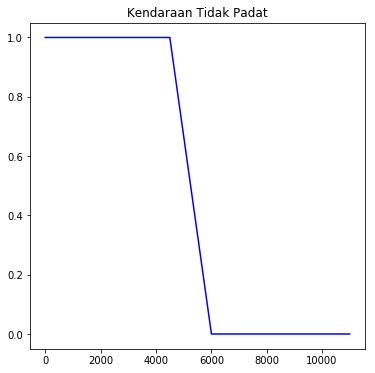

In [7]:
JKD_tidak_padat = fuzz.trapmf(JKD_x,[0,0,4500,6000])
fig1, (ax1) = plt.subplots(nrows=1,figsize=(6,6))
ax1.plot(JKD_x,JKD_tidak_padat,'blue')
ax1.set_title('Kendaraan Tidak Padat')

Plotting fungsi keanggotaan $\mu kendaraanormal(x)$

Text(0.5, 1.0, 'Kendaraan Normal')

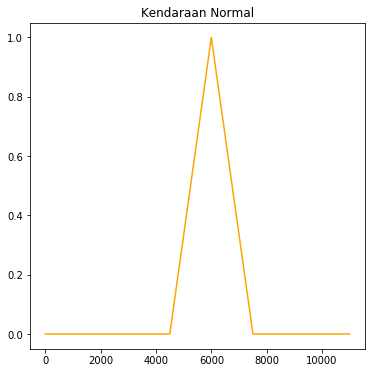

In [8]:
JKD_normal = fuzz.trimf(JKD_x, [4500,6000,7500])
fig2, (ax2) = plt.subplots(nrows=1,figsize=(6,6))
ax2.plot(JKD_x,JKD_normal,'orange')
ax2.set_title('Kendaraan Normal')

Plotting fungsi keanggotaan $\mu kendaraanpadat(x)$

Text(0.5, 1.0, 'Kendaraan Padat')

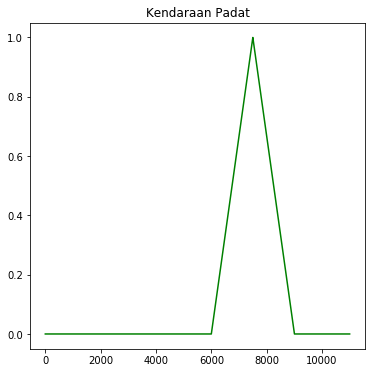

In [9]:
JKD_padat = fuzz.trimf(JKD_x, [6000,7500,9000])
fig3, (ax3) = plt.subplots(nrows=1,figsize=(6,6))
ax3.plot(JKD_x,JKD_padat,'green')
ax3.set_title('Kendaraan Padat')

Plotting fungsi keanggotaan $\mu kendaraansangatpadat(x)$

Text(0.5, 1.0, 'Kendaraan Sangat Padat')

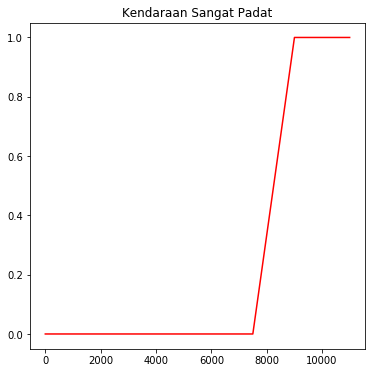

In [10]:
JKD_sangat_padat = fuzz.trapmf(JKD_x, [7500,9000,11000,11000])
fig4, (ax4) = plt.subplots(nrows=1,figsize=(6,6))
ax4.plot(JKD_x,JKD_sangat_padat,'red')
ax4.set_title('Kendaraan Sangat Padat')

Plotting ke empat fungsi keanggotaan Jumlah Kendaraan

C:\Users\Agung\Anaconda3\lib\site-packages\matplotlib\figure.py:445: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  % get_backend())


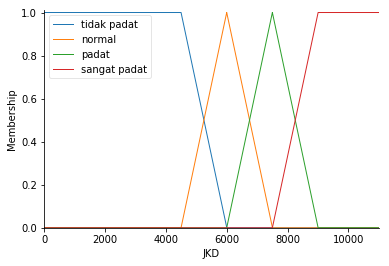

In [11]:
JKD.view()

### Fuzzifikasi JKS
Jumlah Kendaraan saat keadaan selanjutnya(JKS) mempunyai rentang nilai kemacetan dari 0 sampai 11000

In [12]:
JKS = ctrl.Antecedent(np.arange(0, 11000, 1), 'JKS')
JKS_x = np.arange(0,11000,1)

Proses untuk mengubah variabel non numerik menjadi variabel non fuzzy (numerik) menjadi variabel fuzzy (linguistik)

Untuk Jumlah Kendaraan Saat Keadaan Selanjutnya, fungsi keanggotaan dibagi menjadi 4 bagian :
$$ Jumlah Kendaraan Saat Keadaan Selanjutnya $$
$$ Tidak Padat = 0 - 6000$$
$$ Normal = 4500 - 7500$$
$$ Padat = 6000 - 9000$$
$$ Sangat Padat = 7500 - 11000$$

Dengan fungsi keanggotaan jumlah Kendaraan saat keadaan selanjutnya

\begin{equation}
    \mu kendraantidakpadat(x)=\begin{cases}
    1, & \text{$0\leq x\leq4500$}.\\
    (6000 - x)/(6000 - 4500) , & \text{$4500 \leq x \leq 6000$}.\\
    0, & \text{$x\geq 6000$}.\\
  \end{cases}
  \\
  \mu kendaraannormal(x)=\begin{cases}
    0, & \text{$x\leq 4500$ atau $x\geq7500$}.\\
    (x - 4500)/(6000 - 4500) , & \text{$4500 \leq x \leq 6000$}.\\
    (7500 - x)/(7500 - 6000) , & \text{$6000 \leq x \leq 7500$}.\\
  \end{cases}
  \\
    \mu kendaraanpadat(x)=\begin{cases}
    0, & \text{$x\leq 6000$ atau $x\geq9000$}.\\
    (x - 6000)/(7500 - 6000) , & \text{$6000 \leq x \leq 7500$}.\\
    (9000 - x)/(9000 - 7500) , & \text{$7500 \leq x \leq 9000$}.\\
  \end{cases}
  \\
    \mu kendaraansangatpadat(x)=\begin{cases}
    0, & \text{$x\leq 7500$}.\\
    (x - 7500)/(9000 - 7500) , & \text{$7500 \leq x \leq 9000$}.\\
    1, & \text{$9000 \leq x \leq 11000$}.\\
  \end{cases}
\end{equation}

In [13]:
JKS['tidak padat'] = fuzz.trapmf(JKS.universe, [0,0,4500,6000])
JKS['normal'] = fuzz.trimf(JKS.universe, [4500,6000,7500])
JKS['padat'] = fuzz.trimf(JKS.universe, [6000,7500,9000])
JKS['sangat padat'] = fuzz.trapmf(JKS.universe, [7500,9000,11000,11000])

### PLOTTING MEMBERSHIP FUNCTION JKS

Plotting fungsi keanggotaan $\mu kendaraantidakpadat(x)$

Text(0.5, 1.0, 'Kendaraan Tidak Padat')

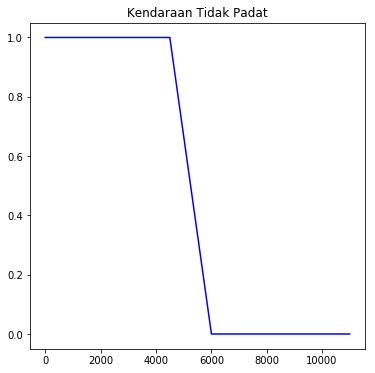

In [14]:
JKS_tidak_padat = fuzz.trapmf(JKS_x,[0,0,4500,6000])
fig1, (ax1) = plt.subplots(nrows=1,figsize=(6,6))
ax1.plot(JKS_x,JKS_tidak_padat,'blue')
ax1.set_title('Kendaraan Tidak Padat')

Plotting fungsi keanggotaan $\mu kendaraannormal(x)$

Text(0.5, 1.0, 'Kendaraan Normal')

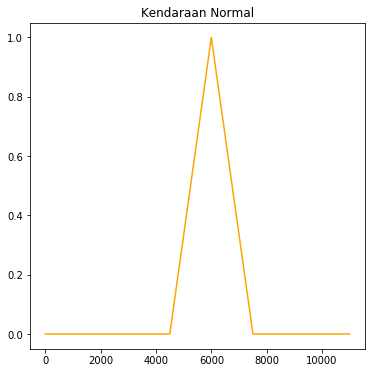

In [15]:
JKS_normal = fuzz.trimf(JKS_x, [4500,6000,7500])
fig2, (ax2) = plt.subplots(nrows=1,figsize=(6,6))
ax2.plot(JKS_x,JKS_normal,'orange')
ax2.set_title('Kendaraan Normal')

Plotting fungsi keanggotaan $\mu kendaraanpadat(x)$

Text(0.5, 1.0, 'Kendaraan Padat')

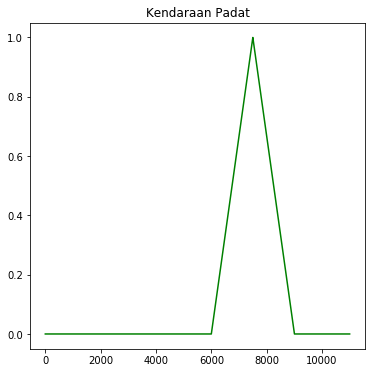

In [16]:
JKS_padat = fuzz.trimf(JKS_x, [6000,7500,9000])
fig3, (ax3) = plt.subplots(nrows=1,figsize=(6,6))
ax3.plot(JKS_x,JKS_padat,'green')
ax3.set_title('Kendaraan Padat')

Plotting fungsi keanggotaan $\mu kendaraansangatpadat(x)$

Text(0.5, 1.0, 'Kendaraan Sangat Padat')

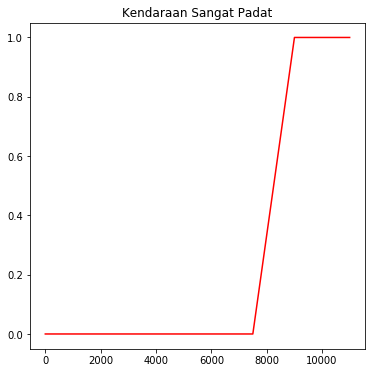

In [17]:
JKS_sangat_padat = fuzz.trapmf(JKS_x, [7500,9000,11000,11000])
fig4, (ax4) = plt.subplots(nrows=1,figsize=(6,6))
ax4.plot(JKS_x,JKS_sangat_padat,'red')
ax4.set_title('Kendaraan Sangat Padat')

Plotting ke empat fungsi keanggotaan Jumlah Kendaraan

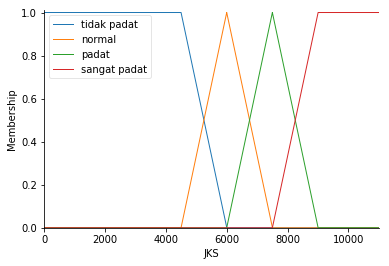

In [18]:
JKS.view()

### Fuzzifikasi DL
Durasi Lampu Hijau(DL) mempunyai rentang nilai durasi dari 0 sampai 100

In [19]:
DL = ctrl.Consequent(np.arange(0, 100, 1), 'DL')
DL_x = np.arange(0,100,1)

Proses untuk mengubah variabel non numerik menjadi variabel non fuzzy (numerik) menjadi variabel fuzzy (linguistik)

Untuk Durasi Lampu Hijau, fungsi keanggotaan dibagi menjadi 4 bagian :
$$ Durasi Lampu Hijau $$
$$ Cepat = 0 - 20$$
$$ Sedang = 14 - 50$$
$$ Agak Lama = 40 - 80$$
$$ Lama = 74 - 100$$

Dengan fungsi keanggotaan Durasi Lampu Hijau

\begin{equation}
    \mu durasicepat(x)=\begin{cases}
    1, & \text{$0\leq x\leq14$}.\\
    (20 - x)/(20 - 14) , & \text{$14 \leq x \leq 20$}.\\
    0, & \text{$x\geq 20$}.\\
  \end{cases}
  \\
  \mu durasisedang(x)=\begin{cases}
    0, & \text{$x\leq 14$ atau $x\geq50$}.\\
    (x - 14)/(40 - 14) , & \text{$14 \leq x \leq 40$}.\\
    (50 - x)/(50 - 40) , & \text{$40 \leq x \leq 50$}.\\
  \end{cases}
  \\
    \mu durasiagaklama(x)=\begin{cases}
    0, & \text{$x\leq 40$ atau $x\geq80$}.\\
    (x - 40)/(74 - 40) , & \text{$40 \leq x \leq 74$}.\\
    (80 - x)/(80 - 74) , & \text{$74 \leq x \leq 80$}.\\
  \end{cases}
  \\
    \mu durasilama(x)=\begin{cases}
    0, & \text{$x\leq 74$}.\\
    (x - 80)/(80 - 74) , & \text{$74 \leq x \leq 80$}.\\
    1, & \text{$x\geq 80$}.\\
  \end{cases}
\end{equation}

In [20]:
DL['cepat'] = fuzz.trapmf(DL.universe, [0,0,14,20])
DL['sedang'] = fuzz.trimf(DL.universe,[14,40,50])
DL['agak lama'] = fuzz.trimf(DL.universe, [40,74,80])
DL['lama'] = fuzz.trapmf(DL.universe, [74,80,100,100])

### PLOTTING MEMBERSHIP FUNCTION DL

Plotting fungsi keanggotaan $\mu durasicepat(x)$

Text(0.5, 1.0, 'Durasi Cepat')

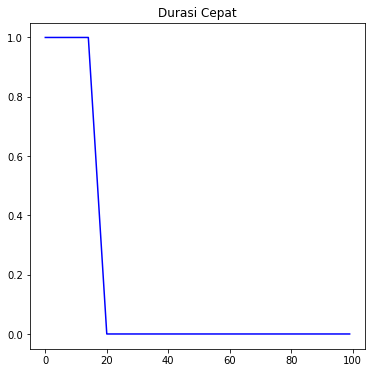

In [21]:
DL_cepat = fuzz.trapmf(DL_x,[0,0,14,20])
fig1, (ax1) = plt.subplots(nrows=1,figsize=(6,6))
ax1.plot(DL_x,DL_cepat,'blue')
ax1.set_title('Durasi Cepat')

Plotting fungsi keanggotaan $\mu durasisedang(x)$

Text(0.5, 1.0, 'Durasi Sedang')

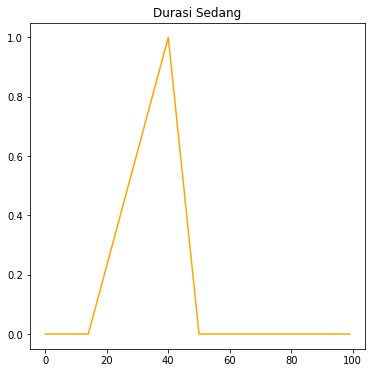

In [22]:
DL_sedang = fuzz.trimf(DL_x,[14,40,50])
fig2, (ax2) = plt.subplots(nrows=1,figsize=(6,6))
ax2.plot(DL_x,DL_sedang,'orange')
ax2.set_title('Durasi Sedang')

Plotting fungsi keanggotaan $\mu durasiagaklama(x)$

Text(0.5, 1.0, 'Durasi Agak Lama')

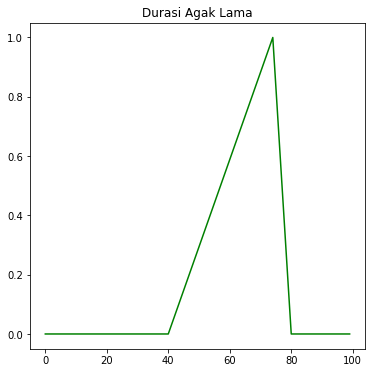

In [23]:
DL_agak_lama = fuzz.trimf(DL_x,[40,74,80])
fig3, (ax3) = plt.subplots(nrows=1,figsize=(6,6))
ax3.plot(DL_x,DL_agak_lama,'green')
ax3.set_title('Durasi Agak Lama')

Plotting fungsi keanggotaan $\mu durasilama(x)$

Text(0.5, 1.0, 'Durasi Lama')

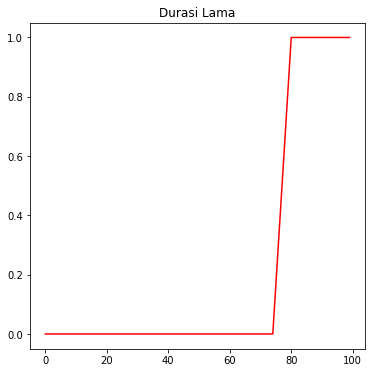

In [24]:
DL_lama = fuzz.trapmf(DL_x,[74,80,100,100])
fig4, (ax4) = plt.subplots(nrows=1,figsize=(6,6))
ax4.plot(DL_x,DL_lama,'red')
ax4.set_title('Durasi Lama')

Plotting ke empat fungsi keanggotaan Durasi Lampu

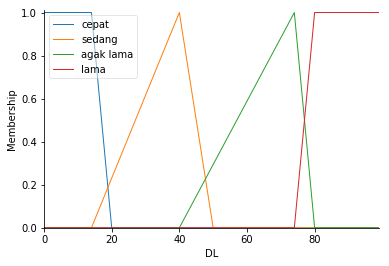

In [25]:
DL.view()

## INFERENCING

Pada tahap inferencing, membuat aturan-aturan fuzzy yang dinyatakan dalam bentuk IF ... THEN ...

Pada sistem ini berdasarkan jumlah fuzzifikasi dari variabel Jumlah Kendaraan saat keadaan diatur yang berjumlah 4 dan fuzzifikasi dari variabel Jumlah Kendaraan saat keadaan selanjutnya yang berjumlah 4, maka rule yang dibuat berjumlah 4 x 4 = 16 rule

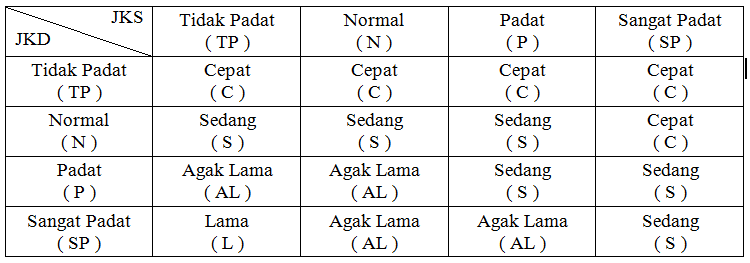

1.  IF JKD = TP, AND JKS = TP, THEN DL = C
2.  IF JKD = TP, AND JKS = N, THEN DL = C
3.  IF JKD = TP, AND JKS = P, THEN DL = C
4.  IF JKD = TP, AND JKS = SP, THEN DL = C

5.  IF JKD = N, AND JKS = TP, THEN DL = S
6.  IF JKD = N, AND JKS = N, THEN DL = S
7.  IF JKD = N, AND JKS = P, THEN DL = S
8.  IF JKD = N, AND JKS = SP, THEN DL = C

9.  IF JKD = P, AND JKS = TP, THEN DL = AL
10. IF JKD = P, AND JKS = N, THEN DL = AL
11. IF JKD = P, AND JKS = P, THEN DL = S
12. IF JKD = P, AND JKS = SP, THEN DL = S

13. IF JKD = SP, AND JKS = TP, THEN DL = L
14. IF JKD = SP, AND JKS = N, THEN DL = AL
15. IF JKD = SP, AND JKS = P, THEN DL = AL
16. IF JKD = SP, AND JKS = SP, THEN DL = S

In [26]:
rule01 = ctrl.Rule(JKD['tidak padat']     & JKS['tidak padat']        , DL['cepat'])
rule02 = ctrl.Rule(JKD['tidak padat']     & JKS['normal']             , DL['cepat'])
rule03 = ctrl.Rule(JKD['tidak padat']     & JKS['padat']              , DL['cepat'])
rule04 = ctrl.Rule(JKD['tidak padat']     & JKS['sangat padat']       , DL['cepat'])

rule05 = ctrl.Rule(JKD['normal']          & JKS['tidak padat']        , DL['sedang'])
rule06 = ctrl.Rule(JKD['normal']          & JKS['normal']             , DL['sedang'])
rule07 = ctrl.Rule(JKD['normal']          & JKS['padat']              , DL['sedang'])
rule08 = ctrl.Rule(JKD['normal']          & JKS['sangat padat']       , DL['cepat'])

rule09 = ctrl.Rule(JKD['padat']           & JKS['tidak padat']        , DL['agak lama'])
rule10 = ctrl.Rule(JKD['padat']           & JKS['normal']             , DL['agak lama'])
rule11 = ctrl.Rule(JKD['padat']           & JKS['padat']              , DL['sedang'])
rule12 = ctrl.Rule(JKD['padat']           & JKS['sangat padat']       , DL['sedang'])

rule13 = ctrl.Rule(JKD['sangat padat']    & JKS['tidak padat']        , DL['lama'])
rule14 = ctrl.Rule(JKD['sangat padat']    & JKS['normal']             , DL['agak lama'])
rule15 = ctrl.Rule(JKD['sangat padat']    & JKS['padat']              , DL['agak lama'])
rule16 = ctrl.Rule(JKD['sangat padat']    & JKS['sangat padat']       , DL['sedang'])

## RULE BASE

(<Figure size 432x288 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0xcbfcff0>)

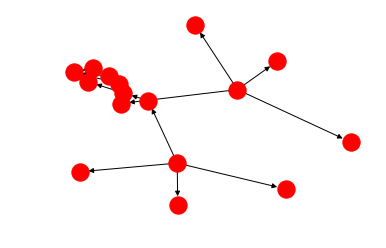

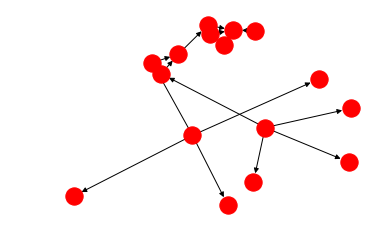

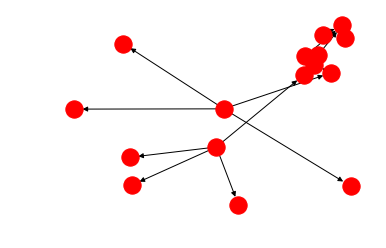

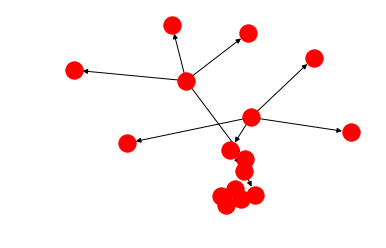

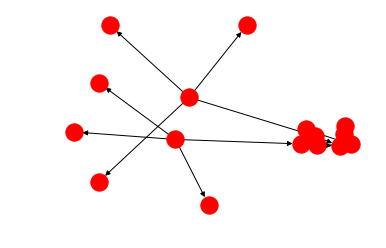

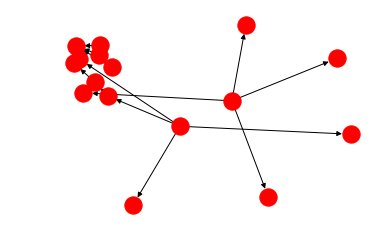

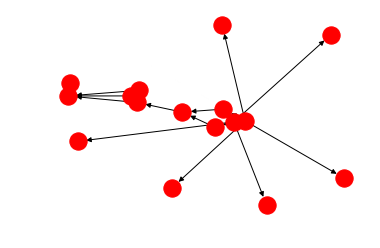

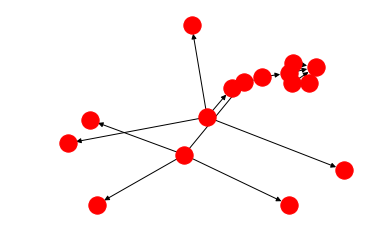

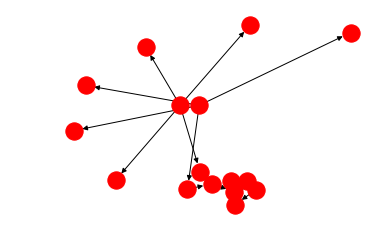

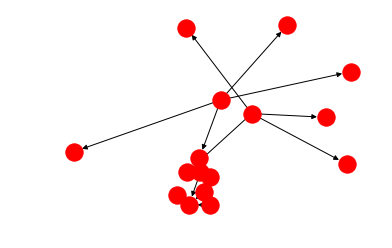

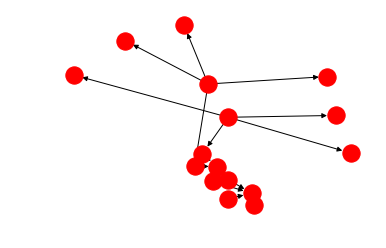

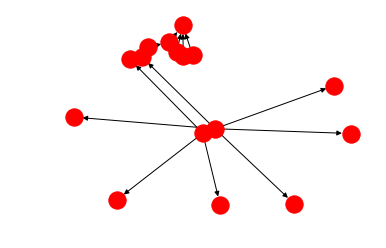

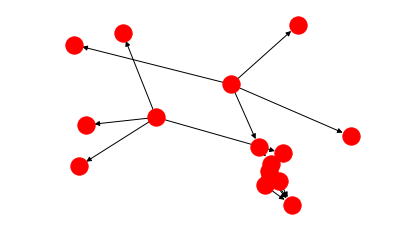

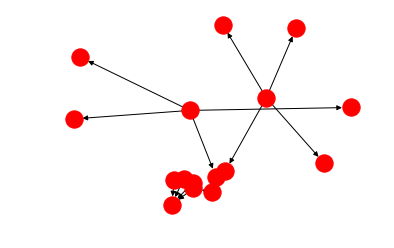

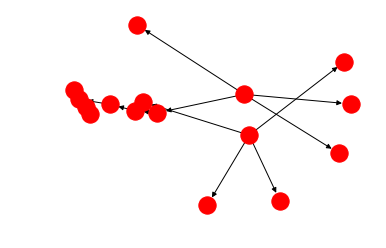

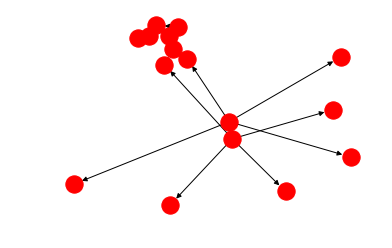

In [27]:
rule01.view()
rule02.view()
rule03.view()
rule04.view()
rule05.view()
rule06.view()
rule07.view()
rule08.view()
rule09.view()
rule10.view()
rule11.view()
rule12.view()
rule13.view()
rule14.view()
rule15.view()
rule16.view()

## RULE EVOLUTION

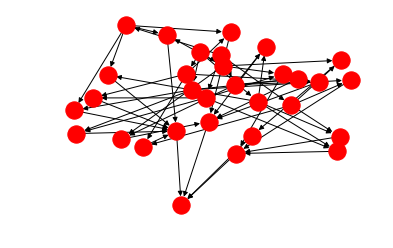

In [36]:
nyala_ctrl = ctrl.ControlSystem([rule01,rule02,rule03,rule04,rule05,rule06,rule07,rule08,rule09,rule10,rule11,rule12,rule13,rule14,rule15,rule16])
nyala_ctrl.view()

## DEFUZZIFIKASI

In [29]:
nyala = ctrl.ControlSystemSimulation(nyala_ctrl)

INPUT Jumlah kendaraan saat keadaan diatur kita masukan 4746 dan Jumlah kendaraan saat keadaan selanjutnya 7435

In [30]:
nyala.input['JKD'] = 4746
nyala.input['JKS'] = 7435

Melakukan perhitungan defuzzifikasi

In [31]:
nyala.compute()

Mencetak hasil output defuzzifikasi

In [32]:
print(nyala.output['DL'])

15.183245370746592


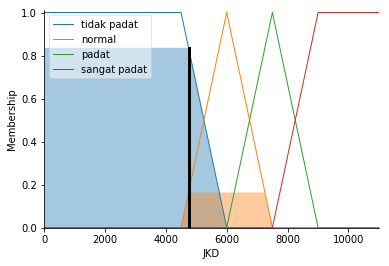

In [33]:
JKD.view(sim=nyala)

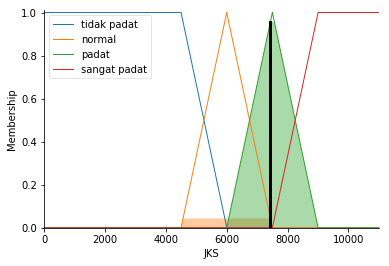

In [34]:
JKS.view(sim=nyala)

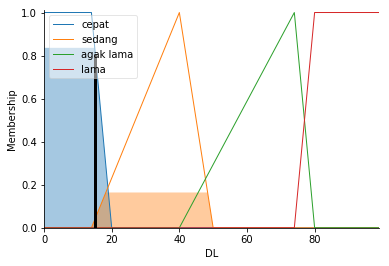

In [35]:
DL.view(sim =nyala)

## Perhitungan Manual

masukan nilai input JKD pada setiap membership function

\begin{equation}
    JKD = 4746.\\
    \mu kendraantidakpadat(x)=\begin{cases}
    1, & \text{$0\leq x\leq4500$}.\\
    (6000 - 4746)/(6000 - 4500) , & \text{$4500 \leq x \leq 6000$}.\\
    0, & \text{$x\geq 6000$}.\\
  \end{cases}
  \\
  \mu kendaraannormal(x)=\begin{cases}
    0, & \text{$x\leq 4500$ atau $x\geq7500$}.\\
    (4746 - 4500)/(6000 - 4500) , & \text{$4500 \leq x \leq 6000$}.\\
    (7500 - x)/(7500 - 6000) , & \text{$6000 \leq x \leq 7500$}.\\
  \end{cases}
  \\
    \mu kendaraanpadat(x)=\begin{cases}
    0, & \text{$x\leq 6000$ atau $x\geq9000$}.\\
    (x - 6000)/(7500 - 6000) , & \text{$6000 \leq x \leq 7500$}.\\
    (9000 - x)/(9000 - 7500) , & \text{$7500 \leq x \leq 9000$}.\\
  \end{cases}
  \\
    \mu kendaraansangatpadat(x)=\begin{cases}
    0, & \text{$x\leq 7500$}.\\
    (x - 7500)/(9000 - 7500) , & \text{$7500 \leq x \leq 9000$}.\\
    1, & \text{$9000\leq x\leq11000$}.\\
  \end{cases}
\end{equation}

\begin{equation}
    \mu kendaraantidakpadat(4746) = (6000 - 4746) / (6000 - 4500) \\
                                  = 1254/1500 \\ 
                                  = 0.84 \\
\end{equation}

\begin{equation}
    \mu kendaraannormal(4746) = (4746 - 4500) / (6000-4500) \\
                              = 246/1500 \\
                              = 0.16 \\
\end{equation}

masukan nilai JKS pada setiap membership function

\begin{equation}
    JKS = 7435.\\
    \mu kendraantidakpadat(x)=\begin{cases}
    1, & \text{$0\leq x\leq4500$}.\\
    (6000 - x)/(6000 - 4500) , & \text{$4500 \leq x \leq 6000$}.\\
    0, & \text{$x\geq 6000$}.\\
  \end{cases}
  \\
  \mu kendaraannormal(x)=\begin{cases}
    0, & \text{$x\leq 4500$ atau $x\geq7500$}.\\
    (x - 4500)/(6000 - 4500) , & \text{$4500 \leq x \leq 6000$}.\\
    (7500 - 7435)/(7500 - 6000) , & \text{$6000 \leq x \leq 7500$}.\\
  \end{cases}
  \\
    \mu kendaraanpadat(x)=\begin{cases}
    0, & \text{$x\leq 6000$ atau $x\geq9000$}.\\
    (7435 - 6000)/(7500 - 6000) , & \text{$6000 \leq x \leq 7500$}.\\
    (9000 - x)/(9000 - 7500) , & \text{$7500 \leq x \leq 9000$}.\\
  \end{cases}
  \\
    \mu kendaraansangatpadat(x)=\begin{cases}
    0, & \text{$x\leq 7500$}.\\
    (x - 7500)/(9000 - 7500) , & \text{$7500 \leq x \leq 9000$}.\\
    1, & \text{$9000 \leq x \leq 11000$}.\\
  \end{cases}
\end{equation}

\begin{equation}
    \mu kendaraannormal(7435) = (7500 - 6000) / (7500 -6000) \\
                              = 65/1500 \\
                              = 0.04 \\
\end{equation}

\begin{equation}
    \mu kendaraanpadat(7435) = (7435 - 6000) / (7500 - 6000) \\
                             = 1435/1500 \\ 
                             = 0.96 \\
\end{equation}

RULE01: IF JKD = TP, AND JKS = TP, THEN DL = C
- =MIN(μTP & μTP )
  =MIN(0,84 & 0)
  = 0

RULE02: IF JKD = TP, AND JKS = N, THEN DL = C
- =MIN(μTP & μN)
  =MIN(0,84 & 0,04)
  =0,04

RULE03: IF JKD = TP, AND JKS = P, THEN DL = C
- =MIN(μTP & μP)
  =MIN(0,84 & 0,96)
  =0,84
        
RULE04: IF JKD = TP, AND JKS = SP, THEN DL = C
- =MIN(μTP & μSP)
  =MIN(0,84 & 0)
  =0
        

RULE05: IF JKD = N, AND JKS = TP, THEN DL = S
- =MIN(μN & μTP)
  =MIN(0,16 & 0)
  =0

RULE06: IF JKD = N, AND JKS = N, THEN DL = S
- =MIN(μN & μN)
  =MIN(0,16 & 0,04)
  =0,04

RULE07: IF JKD = N, AND JKS = P, THEN DL = S
- =MIN(μN & μP)
  =MIN(0,16 & 0,96)
  =0,16

RULE08: IF JKD = N, AND JKS = SP, THEN DL = C
- =MIN(μN & μTP)
  =MIN(0,16 & 0)
  =0


RULE09: IF JKD = P, AND JKS = TP, THEN DL = AL
- =MIN(μP & μTP)
  =MIN(0 & 0)
  =0

RULE10: IF JKD = P, AND JKS = N, THEN DL = AL
- =MIN(μP & μN)
  =MIN(0 & 0,04)
  =0

RULE11: IF JKD = P, AND JKS = P, THEN DL = S
- =MIN(μP & μP)
  =MIN(0 & 0,96)
  =0

RULE12: IF JKD = P, AND JKS = SP, THEN DL = S
- =MIN(μP & μSP)
  =MIN(0 & 0)
  =0


RULE13: IF JKD = SP, AND JKS = TP, THEN DL = L
- =MIN(μSP & μTP)
  =MIN(0 & 0)
  =0

RULE14: IF JKD = SP, AND JKS = N, THEN DL = AL
- =MIN(μSP & μN)
  =MIN(0 & 0,04)
  =0

RULE15: IF JKD = SP, AND JKS = P, THEN DL = AL
- =MIN(μSP & μP)
  =MIN(0 & 0,96)
  =0

RULE16: IF JKD = SP, AND JKS = SP, THEN DL = S
- =MIN(μSP & μSP)
  =MIN(0 & 0)
  =0

### Menghitung Rule (Z)

#### CATATAN : Untuk Rule 1, 4, 5, dan 8 sampai 16 tidak dihitung karena Nilai PREDIC pada rule tersebut adalah 0, karena salah satu dari perbandingan rule bernilai 0 dan tidak akan berpengaruh pada nilai hasil. Perhitungan total hanya menggunakan Rule 2, 3, 6, dan 7.

RULE02: IF JKD = TP, AND JKS = N, THEN DL = C

Lalu lihat keanggotaan Durasi = Cepat  
$$
  \mu durasicepat(x)=\begin{cases}
    (20 - x)/(20 - 14) , & \text{$14 \leq x \leq 20$}.\\
  \end{cases}
 $$
Terdapat 1 nilai keanggotaan yang akan kita masukkan nilainya

$$
(20 - x) / (20 - 14) = 0.04 \\
(20 - x) = 0.24 \\ 
  x = 19,76 (19,80)\\
$$

Maka akan nilai Z$_2$ = 19,76 (19,80)

===============================================================================================================

RULE03: IF JKD = TP, AND JKS = P, THEN DL = C

Lalu lihat keanggotaan Durasi = Cepat  
$$
  \mu durasicepat(x)=\begin{cases}
    (20 - x)/(20 - 14) , & \text{$14 \leq x \leq 20$}.\\
  \end{cases}
 $$
Terdapat 1 nilai keanggotaan yang akan kita masukkan nilainya

$$
(20 - x) / (20 - 14) = 0.84 \\
(20 - x) = 5,04 \\ 
 x = 14,96 (15,0) \\
$$

Maka akan diambil nilai Z$_3$ = 14,96 (15,0)

===============================================================================================================

RULE06: IF JKD = N, AND JKS = N, THEN DL = S

Lalu lihat keanggotaan Durasi = Sedang 
$$
  \mu durasisedang(x)=\begin{cases}
    (x - 14)/(40 - 14) , & \text{$14 \leq x \leq 40$}.\\
    (50 - x)/(50 - 40) , & \text{$40 \leq x \leq 50$}.\\
  \end{cases}
 $$
Terdapat 2 nilai keanggotaan yang akan kita masukkan nilainya

$$
(x - 14)/(40 - 14) = 0,04
(x - 14) = 1,04
 x = 15,04 (15,0)
$$

$$
(50 - x)/(50 - 40) = 0,04
(50 - x) = 0,4
 x = 49,6 (50,0)
$$

Maka akan diambil nilai minimum untuk Z$_6$ = 15,04 (15,0)

===============================================================================================================

RULE07: IF JKD = N, AND JKS = P, THEN DL = S

Lalu lihat keanggotaan Durasi = Sedang 
$$
  \mu durasisedang(x)=\begin{cases}
    (x - 14)/(40 - 14) , & \text{$14 \leq x \leq 40$}.\\
    (50 - x)/(50 - 40) , & \text{$40 \leq x \leq 50$}.\\
  \end{cases}
 $$
Terdapat 2 nilai keanggotaan yang akan kita masukkan nilainya

$$
(x - 14)/(40 - 14) = 0,16
(x - 14) = 4,16
 x = 18,16 (18,2)
$$

$$
(50 - x)/(50 - 40) = 0,16
(50 - x) = 1,6
 x = 48,4
$$

Maka akan diambil nilai minimum untuk Z$_7$ = 18,16 (18,2)

===============================================================================================================

Dari sini kita dapat mencari nilai z, yaitu :

Z =$$ \frac{\alpha predikat_1 \times Z_1 +
\alpha predikat_2 \times Z_2 +
\alpha predikat_3 \times Z_3 +
\alpha predikat_4 \times Z_4 +
\alpha predikat_5 \times Z_5 +
\alpha predikat_6 \times Z_6 +
\alpha predikat_7 \times Z_7 +
\alpha predikat_8 \times Z_8 +
\alpha predikat_9 \times Z_9 +
\alpha predikat_1\,_0 \times Z_1\,_0 +
\alpha predikat_1\,_1 \times Z_1\,_1 +
\alpha predikat_1\,_2 \times Z_1\,_2 +
\alpha predikat_1\,_3 \times Z_1\,_3 +
\alpha predikat_1\,_4 \times Z_1\,_4 +
\alpha predikat_1\,_5 \times Z_1\,_5 +
\alpha predikat_1\,_6 \times Z_1\,_6}
{\alpha predikat_1 + \alpha predikat_2 +
\alpha predikat_3 + \alpha predikat_4 +
\alpha predikat_5 + \alpha predikat_6 +
\alpha predikat_7 + \alpha predikat_8 +
\alpha predikat_9 + \alpha predikat_1\,_0 
+\alpha predikat_1\,_1 +\alpha predikat_1\,_2
+\alpha predikat_1\,_3 +\alpha predikat_1\,_4 
+\alpha predikat_1\,_5 +\alpha predikat_1\,_6}$$

 $$Z = \frac{0+ 0.04 \times 19.8 + 0.84 \times 15.0 +0+0+ 0.04 \times 15.0 + 0.16 \times 18.2 +0+0+0+0+0+0+0+0+0}{0+ 0.04 + 0.84 +0+0+ 0.04 + 0.16 +0+0+0+0+0+0+0+0+0} $$
 
 $$ Z = \frac{0.8 + 12.6 + 0.6 + 2.9}{1.08} $$
 $$ Z = 15.65 $$

Hasil output yang dikeluarkan menggunakan code python sebesar 15,18 detik sedangkan perhitungan manual sebesar 15,65 detik.
Terdapat perbedaan sebesar 0,47 detik

# Referensi
Paper:PEMODELAN SISTEM KONTROL TRAFFIC LIGHT BERDASARKAN KEPADATAN KENDARAAN DENGAN TEKNIK EDGE DETECTION DAN LOGIKA FUZZY
